# **Subway Data Analysis**

## **Introduction**

The NYC public transportantion system - Metro Transit Authority - provides data for download via csv files. Part of the information available are data from the subway turnstiles, containing weekly logs for cumulative entries and exits by turnstile and by subway station during a provided timeframe.

For this project, we will only use the information available at: http://web.mta.info/developers/turnstile.html.

## **About this project**

or this project, you will apply the knowledge acquired in the first month of this course. We will practice basic data acquisition and data cleaning tasks to find out fundamental stuff about the data using what we learned in the Statistics course.

The goal of this project is to explore the relationship between data from the NYC Subway turnstiles and the city weather. For this, besides data from the subway, we will also need data from the weather in NYC.

Here are the main points that will be considered in this work:

Gathering data from the Internet
Using Statistics for Data Analysis
Data handling and simple graphics creation with Pandas
How to find help: We suggest that you try the following channels, in the following order:

| Type of Question\Channels | Google | Forum | Slack | Email | |------------------------------- |-------- |------- |------- |------- | | Pandas and Python Programming | 1 | 2 | 3 | | | Projects Requiriments | | 1 | 2 | 3 | | Projects Specific Parts | | 1 | 2 | 3 |

Here is the address for each of these channels:

Forum: https://discussions.udacity.com/c/ndfdsi-project
Slack: Big Data Foundations
Email: india@udacity.com
The student is expected to submit this report including:

All TODO's completed, as they are crucial for the code to run accordingly
The ipynb file, exported as html
To submit this project, go to the classroom, and submit your zipped .ipynb and html.

## **Reminders**

Before we start, there are a few things you must have in mind while using iPython notebooks:

*   Remember you can see, in the left side of a code cell, when was the last time it ran, if there is a number inside the keys.
*   When starting a new session in the notebook, please make sure to run all cells up to the point where you last left it. Even if the output can still be viewed from the moment you ran your cells in the previews session, the kernel starts in a new state, so you will need to reload all data, etc. in a new session.
*   The previous point is useful to have in mind if your answers do not match what is expected from the quizzes in the classroom. Try reloading the data and running all processing steps, one by one, to make sure you're working with the same variables and data from each step of the quizz.

# Session 1 - Data **Gathering**

## **Exercise 1.1**

Let's do it!! Now it's your turn to gather data. Please write bellow a Python code to access the link http://web.mta.info/developers/turnstile.html and download all files from June 2017. The file must be named turnstile_100617.txt, where 10/06/17 is the file's date.

Please see below a few commands that might help you:

Use the urllib library to open and redeem a webpage. Use the command below, where url is the webpage path to the following file:

u = urllib.urlopen(url)

html = u.read()

Use the BeautifulSoup library to search for the link to the file you want to donwload in the page. Use the command below to create your soup object and search for all 'a' tags in the document:

soup = BeautifulSoup(html, "html.parser")

links = soup.find_all('a')

A tip to only download the files from June is to check data in the name of the file. For instance, to download the 17/06/2017 file, please see if the link ends with "turnstile_170610.txt". If you forget to do this, you will download all files from that page. In order to do this, you can use the following command:

if '1706' in link.get('href'):

Our final tip is to use the command bellow to download the txt file:

urllib.urlretrieve(link_do_arquivo, filename)

Please remember - you first have to load all packages and functions that will be used in your analysys.

In [21]:
import urllib.request
from bs4 import BeautifulSoup

# Define the base URL for the MTA website
u = urllib.request.urlopen("http://web.mta.info/developers/turnstile.html")
html = u.read()
soup = BeautifulSoup(html, "html.parser")
filenames = []

# Process and download files matching the pattern
for a in soup.find_all('a', href=True):
    if '1706' in a['href']:
        url = "http://web.mta.info/developers/" + a['href']
        filename = a['href'][20:-3] + "csv"
        filenames.append(filename)
        print("Trying to retrieve file " + filename + " from server...")
        try:
            urllib.request.urlretrieve(url, filename)
            print(filename + " is saved.")
        except:
            print("Error fetching file " + filename + " from server!")


## **Exercise 1.2**

Write down a function that takes the list of all names of the files you downloaded in Exercise 1.1 and compile them into one single file. There must be only one header line in the output file.

For example, if file_1 has: line 1... line 2...

and the other file, file_2, has: line 3... line 4... line 5...

We must combine file_1 and file_2 into one master file, as follows:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn' line 1... line 2... line 3... line 4... line 5... import csv

In [22]:
import csv

def merge_turnstile_data(file_list, output_file_name):
    try:
        with open(output_file_name, 'w', newline='') as master_csv:
            # Write header to the master file
            master_csv.write('C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')

            for file_name in file_list:
                # Open each file and read its content
                with open(file_name, 'r') as turnstile_file:
                    reader = csv.reader(turnstile_file)
                    next(reader, None)  # Skip the header row

                    # Write data to the master file
                    writer = csv.writer(master_csv, quoting=csv.QUOTE_ALL)
                    for row in reader:
                        writer.writerow(row)

            print("All files have been successfully merged and saved.")
    except Exception as error:
        print(f"Error merging files: {error}")

merge_turnstile_data(turnstile_files, "final_turnstile_data.csv")


All files have been successfully merged and saved.


## **Exercise 1.3**

For this exercise, you will write a function that reads the master_file created in the previous exercise and load it into a Pandas Dataframe. This function can be filtered, so that the Dataframe only has lines where column "DESCn" has the value "Regular".

For example, if the Pandas Dataframe looks like this:

,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn

0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151

1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159

2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177

3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

The Dataframe must look like the following, after filtering only the lines where column DESCn has the value REGULAR:

0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151

2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177

In [23]:
import pandas as pd

def filter_regular_entries(file_name):
    data = pd.read_csv(file_name)
    regular_entries = data[data["DESCn"] == 'REGULAR']
    return regular_entries

filtered_data = filter_regular_entries("final_turnstile_data.csv")
filtered_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn


## **Exercise 1.4**

The NYC Subway data has cumulative entry and exit data in each line. Let's assume you have a Dataframe called df, which contains only lines for one particular turnstile (unique SCP, C/A, and UNIT). The following function must change these cumulative entries for counting all entries since the last reading (entries from the last line of the Dataframe).

More specifically, there are two things you should do:

1 - Create a new column, called ENTRIESn_hourly 2 - Insert in this column the difference between ENTRIESn in the current and the previous column. If the line has any NAN, fill it out/replace by 1.

Tip: The funtions shift() and fillna() in Pandas might be usefull for this exercise.

Below you will find and example of how your Dataframe should look by the end of this exercise:

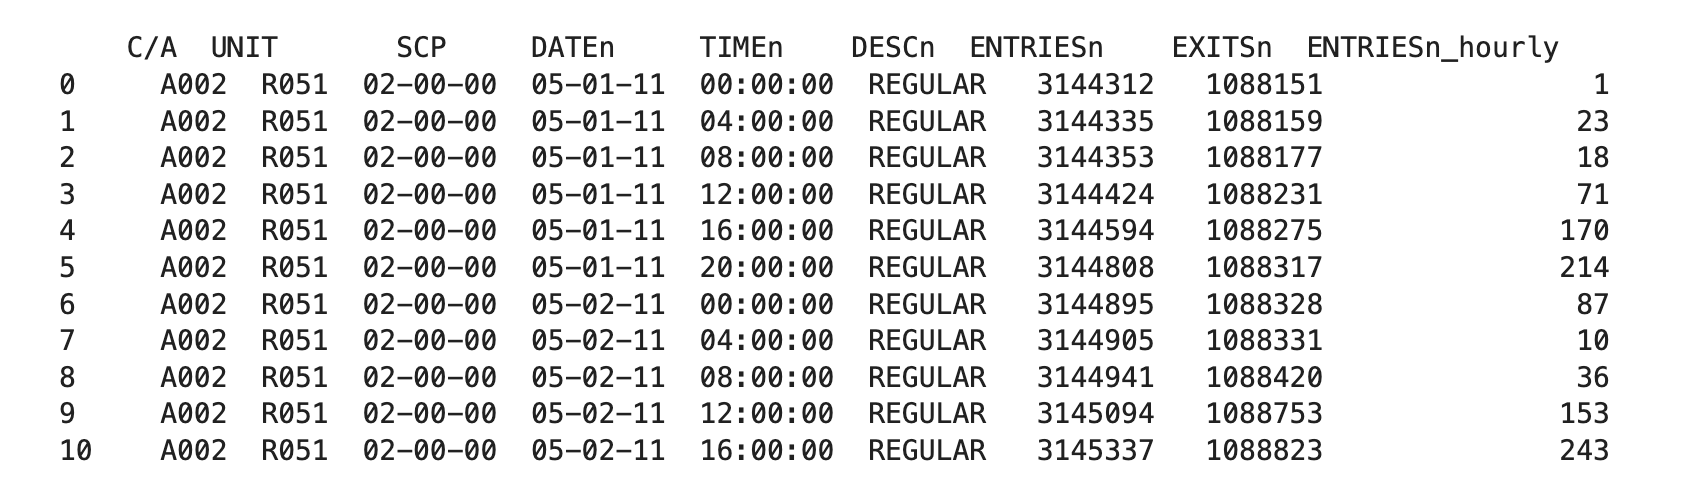

In [24]:
def calculate_hourly_entries(data_frame):
    data_frame = data_frame.fillna(0)
    data_frame['ENTRIESn_hourly'] = data_frame['ENTRIESn'].diff().fillna(0).astype(int)
    return data_frame

data = pd.read_csv("final_turnstile_data.csv")
hourly_entries_data = calculate_hourly_entries(data)
hourly_entries_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly


## **Exercise 1.5**

Do the same thing you did in the previous exercise, but taking into account the exits, column EXITSn. For this, you need to create a column called EXITSn_hourly and insert the difference between the column EXITSn in the current line vs he previous line. If there is any NaN, fill it out/replace by 0.

In [25]:
def calculate_hourly_exits(data_frame):
    data_frame = data_frame.fillna(0)
    data_frame['EXITSn_hourly'] = data_frame['EXITSn'].diff().fillna(0).astype(int)
    return data_frame

data = pd.read_csv("final_turnstile_data.csv")
hourly_exits_data = calculate_hourly_exits(data)
hourly_exits_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,EXITSn_hourly


## **Exercise 1.6**

Given an entry variable that represents time, in the format: "00:00:00" (hour: minutes: seconds) Write a function to extract the hour part from the time in the entry variable And return it as an integer. For example: 1) if hour is 00, your code must return 0 2) if hour is 01, your code must return 1 3) if hour is 21, your code must return 21 Please return te hour as an integer.

In [26]:
def extract_hour_from_time(time_string):
    hour = int(time_string[:2])
    return hour

print(extract_hour_from_time('00:21:12'))  # Output: 0
print(extract_hour_from_time('01:54:55'))  # Output: 1
print(extract_hour_from_time('21:23:12'))  # Output: 21

0
1
21


# Exercise 2 - Data **Analysis**

## **Exercise 2.1**

To understand the relationship between the Subway activity and the weather, please complete the data from the file already downloaded with the weather data. We provided you with the file containing NYC weather data and made it available with the Support Material. You can access it through the link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now that we have our data in a csv file, write Python code that reads this file and saves it into a Pandas Dataframe.

Tip:

Use the command below to read the file:

pd.read_csv('output_list.txt', sep=",")

In [28]:
# Load the dataset
file_name = "turnstile_data_master_with_weather.csv"
data = pd.read_csv(file_name, sep=",")


## **Exercise 2.2**

Now, create a function that calculates the number of rainy days. For this, return the count of the number of days where the column "rain" is equal to 1.

Tip: You might think that interpreting numbers as integers or floats might not work at first. To handle this issue, it might be useful to convert these numbers into integers. You can do this by writting cast (column as integer). So, for example, if we want to launch the column maxtempi as an integer, we have to write something like cast (maxtempi as integer) = 76, instead of just where maxtempi = 76.

In [29]:
def count_rainy_days(data_frame):
   rainy_days_count = data_frame['rain'].astype(int).sum()
   return rainy_days_count

rainy_days = count_rainy_days(data)
print(f"Number of rainy days: {rainy_days}")


Number of rainy days: 44104


## **Exercise 2.3**

Calculate if the day was cloudy or not (0 or 1) and the maximum temperature for fog (i.e. the maximum temperature for cloudy days).

In [30]:
def max_temperature_on_foggy_days(data_frame):
    # Filter rows where 'fog' is 1
    foggy_days = data_frame[data_frame['fog'] == 1]

    # Find the maximum temperature from 'maxtempi' column
    if not foggy_days.empty:
        max_temp = foggy_days['maxtempi'].max()
        return int(max_temp)
    else:
        return None  # If no foggy days are found

max_temp_foggy = max_temperature_on_foggy_days(data)
print(f"Maximum temperature on foggy days: {max_temp_foggy}")

Maximum temperature on foggy days: 81


## **Exercise 2.4**

Now, calculate the mean for 'meantempi' for the days that are Saturdays or Sundays (weekend):

In [31]:
from datetime import datetime

def average_weekend_temperature(file_name):
    data_frame = pd.read_csv(file_name)
    data_frame['weekday'] = pd.to_datetime(data_frame['DATEn']).dt.weekday
    weekend_data = data_frame[data_frame['weekday'].isin([5, 6])]
    avg_temp = weekend_data['meantempi'].mean()
    return avg_temp

avg_weekend_temp = average_weekend_temperature(file_name)
print(f"Average weekend temperature: {avg_weekend_temp}")


Average weekend temperature: 65.10066685403307


## **Exercise 2.5**

Calculate the mean of the minimum temperature 'mintempi' for the days when the minimum temperature was greater that 55 degrees:

In [32]:
def average_min_temperature(data_frame):
    filtered_temps = data_frame[data_frame['mintempi'] > 55]
    avg_min_temp = filtered_temps['mintempi'].mean()
    return avg_min_temp

avg_min_temp_rainy = average_min_temperature(data)
print(f"Average minimum temperature above 55°F: {avg_min_temp_rainy}")


Average minimum temperature above 55°F: 63.2699012987013


## **Exercise 2.6**

Before you make any analysis, it might be useful to look at the data we want to analyse. More specifically, we will evaluate the entries by hour in our data from the NYC Subway to determine the data distribution. This data is stored in the column ['ENTRIESn_hourly']. Draw two histogramns in the same axis, to show the entries when it's raining vs when it's not. Below, you will find an example of how to draw histogramns with Pandas and Matplotlib:

Turnstile_weather ['column_to_graph']. Hist ()

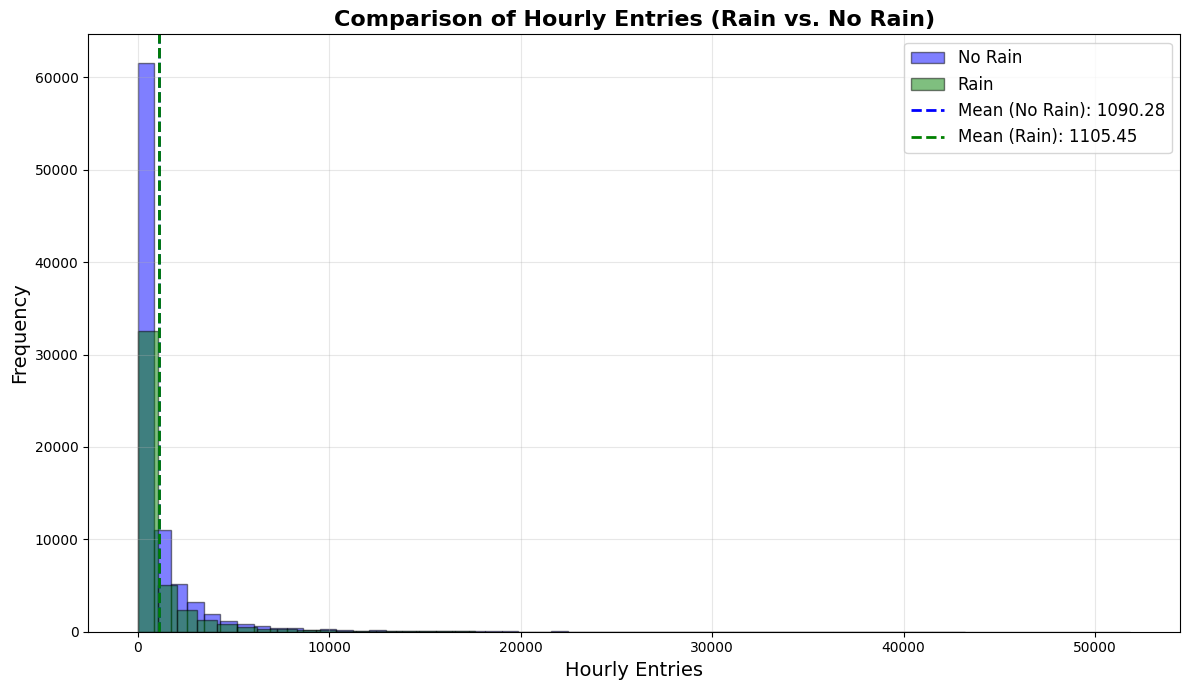

In [33]:
import matplotlib.pyplot as plt

def plot_entries_histogram(data_frame):
    plt.figure(figsize=(12, 7))

    # Separate data into two groups: rain and no rain
    no_rain = data_frame[data_frame['rain'] == 0]['ENTRIESn_hourly']
    rain = data_frame[data_frame['rain'] == 1]['ENTRIESn_hourly']

    # Plot histograms
    plt.hist(no_rain, bins=50, color="blue", alpha=0.5, label="No Rain", edgecolor="black")
    plt.hist(rain, bins=50, color="green", alpha=0.5, label="Rain", edgecolor="black")

    # Calculate and add mean lines
    no_rain_mean = no_rain.mean()
    rain_mean = rain.mean()
    plt.axvline(no_rain_mean, color="blue", linestyle="dashed", linewidth=2, label=f"Mean (No Rain): {no_rain_mean:.2f}")
    plt.axvline(rain_mean, color="green", linestyle="dashed", linewidth=2, label=f"Mean (Rain): {rain_mean:.2f}")

    # Add titles, labels, and legends
    plt.title("Comparison of Hourly Entries (Rain vs. No Rain)", fontsize=16, weight="bold")
    plt.xlabel("Hourly Entries", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_entries_histogram(data)



## **Exercise 2.7**

The data you just plotted is in what kind of distribution? Is there a difference in distribution between rainy and non-rainy days?

**Answer**: The data follows a right-skewed distribution for both rainy and non-rainy days. However, on rainy days, the hourly subway entries are generally lower compared to non-rainy days. This indicates that rainfall likely reduces subway usage, with fewer people commuting during rainy weather conditions. While both distributions exhibit similar shapes, the peak frequency and spread differ, highlighting the impact of weather on subway usage patterns.

## **Exercise 2.8**

Build a function that returns:

1. The mean of entries when it's raining

2. The mean of entries when it's not raining

In [34]:
def calculate_hourly_entry_means(file_name):
    data_frame = pd.read_csv(file_name)
    with_rain_mean = data_frame[data_frame['rain'] == 1]['ENTRIESn_hourly'].mean()
    without_rain_mean = data_frame[data_frame['rain'] == 0]['ENTRIESn_hourly'].mean()
    return with_rain_mean, without_rain_mean

mean_with_rain, mean_without_rain = calculate_hourly_entry_means(file_name)
print(f"Mean hourly entries (with rain): {mean_with_rain}")
print(f"Mean hourly entries (without rain): {mean_without_rain}")


Mean hourly entries (with rain): 1105.4463767458733
Mean hourly entries (without rain): 1090.278780151855


Answer to the following questions according to your functions' exits:

1. What is the mean of entries when it's raining?
2. What is the mean of entries when it's not raining?

**Answer** :

1. The mean of entries when it's raining is 1105.4463767458733.

2. The mean of entries when it's not raining is 1090.278780151855.

# **Exercise 3 - Map Reduce**

## **Exercise 3.1**

The entry for this exercise is the same file from the previous session (Exercise 2). You can download the file from this link:

https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now, we will create a mapper. For each entry line, the mapper exit must PRINT (not return) UNIT as a key, and the number of ENTRIESn_hourly as the value. Separate the key and the value with a tab. For example: 'R002 \ t105105.0'

Export your mapper into a file named mapper_result.txt and send it with your submission. The code for exporting your mapper is already written in the code bellow.

In [35]:
import sys

def map_turnstile_entries():
     for line in sys.stdin:
        data = line.strip().split(',')
        # Skip the header
        if data[1] == 'UNIT':
            continue
        try:
            unit = data[1]
            entries_hourly = data[6]
            print(f"{unit}\t{entries_hourly}")
        except IndexError:
            # Handle lines with unexpected format
            continue

# Redirect input and output for testing purposes
if __name__ == "__main__":
    sys.stdin = open('turnstile_data_master_with_weather.csv')
    sys.stdout = open('mapper_result.txt', 'w')
    map_turnstile_entries()

## **Exercise 3.2**

Now, create the reducer. Given the mapper result from the previous exercise, the reducer must print (not return) one line per UNIT, with the total number of ENTRIESn_hourly during May (which is our data duration), separated by a tab. An example of exit line from the reducer may look like this: 'R001 \ t500625.0'

You can assume that the entry for the reducer is ordered in a way that all lines corresponding to a particular unit are grouped. However, the reducer exit will have repetition, as there are stores that appear in different files' locations.

Export your reducer into a file named reducer_result.txt and send it with your submission.

In [36]:
import sys

def reduce_turnstile_entries():
    previous_unit = None
    total_entries = 0.0

    for line in sys.stdin:
        data = line.strip().split("\t")
        if len(data) != 2:
            # Skip lines with unexpected format
            continue
        current_unit, entries = data

        if previous_unit and previous_unit != current_unit:
            # Output the total for the previous unit
            print(f"{previous_unit}\t{total_entries}")
            total_entries = 0.0  # Reset total entries for the new unit

        previous_unit = current_unit
        try:
            total_entries += float(entries)
        except ValueError:
            # Skip entries with invalid numeric values
            continue

    # Output the total for the last unit
    if previous_unit is not None:
        print(f"{previous_unit}\t{total_entries}")

# Redirect input and output for testing purposes
if __name__ == "__main__":
    sys.stdin = open('mapper_result.txt')
    sys.stdout = open('reducer_result.txt', 'w')
    reduce_turnstile_entries()
